# Bank Account Fraud Detection - Undersampling Analysis

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

**Read Data**

In [2]:
# import data
data = pd.read_csv('../data/raw/raw_data.csv')
print(f"data shape: {data.shape}")
data.head()

data shape: (1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


## Data Cleaning

1. Split into numerical and categorical columns
2. Check number of missing values

In [3]:
# define categorical and numerical columns
categorical_columns = ['fraud_bool', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session']

# define numerical columns, everything else
numerical_columns = [col for col in data.columns if col not in categorical_columns]

In [4]:
# change datatype of categorical columns to 'category'
data[categorical_columns] = data[categorical_columns].astype('category')

In [5]:
# print columnn names
data.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

**Conclusion on Missing Values Analysis**

| Columns with Missing Values | % of Fraud Cases that have missing values | % of Non-Fraud Cases that have missing values |
|:----------------------------|:------------------------------------------|:----------------------------------------------|
| prev_address_months_count | 91.8% | 71.1% |
| current_address_months_count | 0.44% | 1.39% |
| intended_balcon_amount | 88.4% | 74.1% |
| bank_months_count | 37.5% | 25.2% |
| session_length_in_minutes | 0.16% | 0.20% |
| device_distinct_emails_8w | 1.41% | 0.66% |

* Insights:
    * Ok to remove `current_address_months_count` and `session_length_in_minutes` because a small proportion of fraud cases are in these missing values.
    * If other columns have missing values, it could be a pattern for fraud.
    * **81.1%** of fraud cases have `prev_address_months_count` and `intended_balcon_amount` as missing values, compared to only **51.9%** of all non-fraud cases as missing values.

In [6]:
# undersample data 1:5
data_fraud = data[data['fraud_bool'] == 1]
data_non_fraud = data[data['fraud_bool'] == 0].sample(n=len(data_fraud)*5, random_state=42)

# combine data
data = pd.concat([data_fraud, data_non_fraud])

# shuffle data
data = data.sample(frac=1, random_state=42)

# check data
print(f'data shape: {data.shape}')
data.head()

data shape: (66174, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
753634,0,0.1,0.852815,-1,186,40,0.021648,-1.242188,AB,1393,...,0,500.0,0,INTERNET,14.667689,linux,0,1,0,5
345096,0,0.1,0.024735,27,15,20,8.968983,103.933716,AA,2821,...,0,200.0,0,INTERNET,11.977077,other,1,1,0,2
192108,0,0.1,0.396306,-1,80,30,0.004079,7.543880,AB,1635,...,1,200.0,0,INTERNET,1.377152,windows,1,1,0,1
987234,0,0.3,0.042469,-1,146,30,0.006238,-0.717046,AB,2031,...,0,200.0,0,INTERNET,3.073752,windows,0,1,0,7
318577,1,0.9,0.914228,166,15,50,11.255827,98.472601,AA,1853,...,0,500.0,0,INTERNET,6.604306,windows,0,1,0,2


In [7]:
data.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix Numerical Variables')

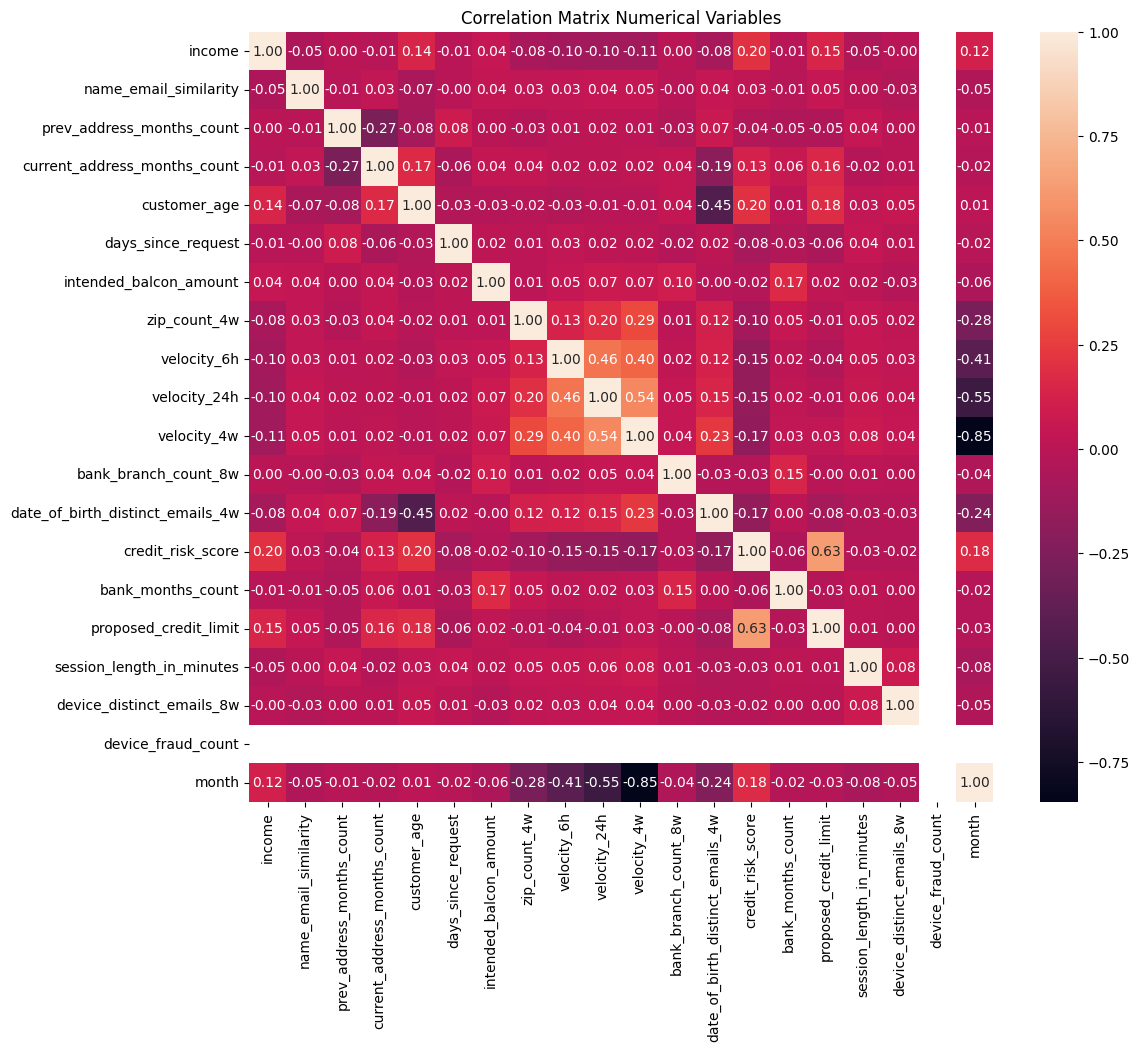

In [8]:
# plot correlation matrix for numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_columns].corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix Numerical Variables')

In [9]:
columns_to_drop = ['velocity_4w', 'device_fraud_count']
data = data.drop(columns=columns_to_drop)

# check data
print(f'data shape: {data.shape}')
data.head()

data shape: (66174, 30)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
753634,0,0.1,0.852815,-1,186,40,0.021648,-1.242188,AB,1393,...,1,0,500.0,0,INTERNET,14.667689,linux,0,1,5
345096,0,0.1,0.024735,27,15,20,8.968983,103.933716,AA,2821,...,6,0,200.0,0,INTERNET,11.977077,other,1,1,2
192108,0,0.1,0.396306,-1,80,30,0.004079,7.543880,AB,1635,...,2,1,200.0,0,INTERNET,1.377152,windows,1,1,1
987234,0,0.3,0.042469,-1,146,30,0.006238,-0.717046,AB,2031,...,30,0,200.0,0,INTERNET,3.073752,windows,0,1,7
318577,1,0.9,0.914228,166,15,50,11.255827,98.472601,AA,1853,...,-1,0,500.0,0,INTERNET,6.604306,windows,0,1,2


## EDA Bank Activity and Device Activity

* Device Activity:
    * `session_length_in_minutes`
    * `device_os`
    * `keep_alive_session`
    * `device_distinct_emails_8w`
    * `source`
    * `foreign_request`

* Bank Activity:
    * `zip_count_4w`
    * `velocity_6h`
    * `velocity_24h`
    * `velocity_4w`
    * `bank_branch_count_8w`
    * `date_of_birth_distinct_emails_4w`


In [ ]:
# select columns related to device activity
device_activity  = ['fraud_bool', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'source', 'foreign_request']
device_activity_df = data[device_activity]

# print shape
device_activity_df.shape

In [ ]:
# for each column, if it is categorical, plot the value counts, if it is numerical, plot histogram
# put in a 3 x 3 grid, and color code the fraud_bool column
# print all except the first column
plt.figure(figsize=(15, 15))
for i, col in enumerate(device_activity_df.columns[1:]):
    plt.subplot(3, 3, i+1)
    if device_activity_df[col].dtype.name == 'category':
        sns.countplot(data=device_activity_df, x=col, hue='fraud_bool')
    else:
        sns.histplot(data=device_activity_df, x=col, hue='fraud_bool', bins=100)

In [ ]:
print(f'device_activity_df shape: {device_activity_df.shape}')
device_activity_df.head()

In [10]:
# import DBSCAN from sklearn
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [ ]:
device_activity_df.dtypes

In [ ]:
# prep data
nomial_categorical_columns = ['device_os', 'device_distinct_emails_8w', 'source', 'keep_alive_session', 'foreign_request']
device_activity_df = pd.get_dummies(device_activity_df, columns=nomial_categorical_columns)
device_activity_without_fraud_col = device_activity_df.drop(columns=['fraud_bool'])
fraud_col = device_activity_df['fraud_bool']

# print shape
print(f'device_activity_without_fraud_col shape: {device_activity_without_fraud_col.shape}')
device_activity_without_fraud_col.head()

In [ ]:
# fit DBSCAN basic first
dbscan = DBSCAN(eps=0.5, min_samples=17)
dbscan.fit(device_activity_without_fraud_col)

labels = dbscan.labels_
# add labels to dataset
device_activity_without_fraud_col['DBSCAN_labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
device_activity_without_fraud_col['DBSCAN_labels'].value_counts()

In [ ]:
device_activity_without_fraud_col.head()

In [ ]:
# plot
plt.figure(figsize=(10,10))
plt.scatter(device_activity_without_fraud_col.iloc[:, 0],device_activity_without_fraud_col.iloc[:, 1],
            c=device_activity_without_fraud_col['DBSCAN_labels'],
            s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

#### DBSCAN on features deemed important so far

In [46]:
# important features
important_features = ['credit_risk_score', 'name_email_similarity', 'device_os', 'housing_status', 'proposed_credit_limit', 'has_other_cards', 'phone_home_valid',
                      'prev_address_months_count', 'intended_balcon_amount',
                      'keep_alive_session']

# select important features
impt_data = data[important_features]

# check shape
print(f'impt_data shape: {impt_data.shape}')
impt_data.head()

impt_data shape: (66174, 10)


,credit_risk_score,name_email_similarity,device_os,housing_status,proposed_credit_limit,has_other_cards,phone_home_valid,prev_address_months_count,intended_balcon_amount,keep_alive_session
753634,179,0.852815,linux,BA,500.0,0,0,-1,-1.242188,0
345096,64,0.024735,other,BB,200.0,0,0,27,103.933716,1
192108,109,0.396306,windows,BE,200.0,1,1,-1,7.543880,1
987234,106,0.042469,windows,BA,200.0,0,1,-1,-0.717046,0
318577,149,0.914228,windows,BA,500.0,0,0,166,98.472601,0


In [47]:
categorical_columns = ['device_os', 'housing_status', 'has_other_cards', 'phone_home_valid', 'keep_alive_session']
numerical_columns = [col for col in impt_data.columns if col not in categorical_columns]

# standardize numerical columns
scaler = StandardScaler()
impt_data[numerical_columns] = scaler.fit_transform(impt_data[numerical_columns])

# one-hot encode categorical columns
impt_data = pd.get_dummies(impt_data, columns=categorical_columns)

# check shape
print(f'impt_data shape: {impt_data.shape}')
impt_data.head()

impt_data shape: (66174, 23)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_19024/2378245968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impt_data[numerical_columns] = scaler.fit_transform(impt_data[numerical_columns])


,credit_risk_score,name_email_similarity,proposed_credit_limit,prev_address_months_count,intended_balcon_amount,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,...,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,has_other_cards_0,has_other_cards_1,phone_home_valid_0,phone_home_valid_1,keep_alive_session_0,keep_alive_session_1
753634,0.552620,1.278732,-0.124008,-0.378350,-0.458333,True,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
345096,-1.008408,-1.548023,-0.692388,0.285315,4.901653,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
192108,-0.397571,-0.279620,-0.692388,-0.378350,-0.010577,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,True
987234,-0.438294,-1.487486,-0.692388,-0.378350,-0.431571,False,False,False,True,False,...,False,False,False,False,True,False,False,True,True,False
318577,0.145395,1.488374,-0.124008,3.579937,4.623343,False,False,False,True,False,...,False,False,False,False,True,False,True,False,True,False


In [48]:
# fit DBSCAN basic first
dbscan = DBSCAN(eps=0.5, min_samples=24)
dbscan.fit(impt_data)

labels = dbscan.labels_
# add labels to dataset
impt_data['DBSCAN_labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 107
Estimated number of noise points: 43346


In [49]:
# check impt_data
impt_data.head()

,credit_risk_score,name_email_similarity,proposed_credit_limit,prev_address_months_count,intended_balcon_amount,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,...,housing_status_BE,housing_status_BF,housing_status_BG,has_other_cards_0,has_other_cards_1,phone_home_valid_0,phone_home_valid_1,keep_alive_session_0,keep_alive_session_1,DBSCAN_labels
753634,0.552620,1.278732,-0.124008,-0.378350,-0.458333,True,False,False,False,False,...,False,False,False,True,False,True,False,True,False,-1
345096,-1.008408,-1.548023,-0.692388,0.285315,4.901653,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,-1
192108,-0.397571,-0.279620,-0.692388,-0.378350,-0.010577,False,False,False,True,False,...,True,False,False,False,True,False,True,False,True,-1
987234,-0.438294,-1.487486,-0.692388,-0.378350,-0.431571,False,False,False,True,False,...,False,False,False,True,False,False,True,True,False,0
318577,0.145395,1.488374,-0.124008,3.579937,4.623343,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,-1


In [50]:
# create fraud column
fraud_col = data['fraud_bool']

# combine impt_data and fraud_col store in another df
impt_data_w_fraud = pd.concat([impt_data, fraud_col], axis=1)

# check shape
print(f'impt_data_w_fraud shape: {impt_data_w_fraud.shape}')
impt_data_w_fraud.head()

impt_data_w_fraud shape: (66174, 25)


,credit_risk_score,name_email_similarity,proposed_credit_limit,prev_address_months_count,intended_balcon_amount,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,...,housing_status_BF,housing_status_BG,has_other_cards_0,has_other_cards_1,phone_home_valid_0,phone_home_valid_1,keep_alive_session_0,keep_alive_session_1,DBSCAN_labels,fraud_bool
753634,0.552620,1.278732,-0.124008,-0.378350,-0.458333,True,False,False,False,False,...,False,False,True,False,True,False,True,False,-1,0
345096,-1.008408,-1.548023,-0.692388,0.285315,4.901653,False,False,True,False,False,...,False,False,True,False,True,False,False,True,-1,0
192108,-0.397571,-0.279620,-0.692388,-0.378350,-0.010577,False,False,False,True,False,...,False,False,False,True,False,True,False,True,-1,0
987234,-0.438294,-1.487486,-0.692388,-0.378350,-0.431571,False,False,False,True,False,...,False,False,True,False,False,True,True,False,0,0
318577,0.145395,1.488374,-0.124008,3.579937,4.623343,False,False,False,True,False,...,False,False,True,False,True,False,True,False,-1,1


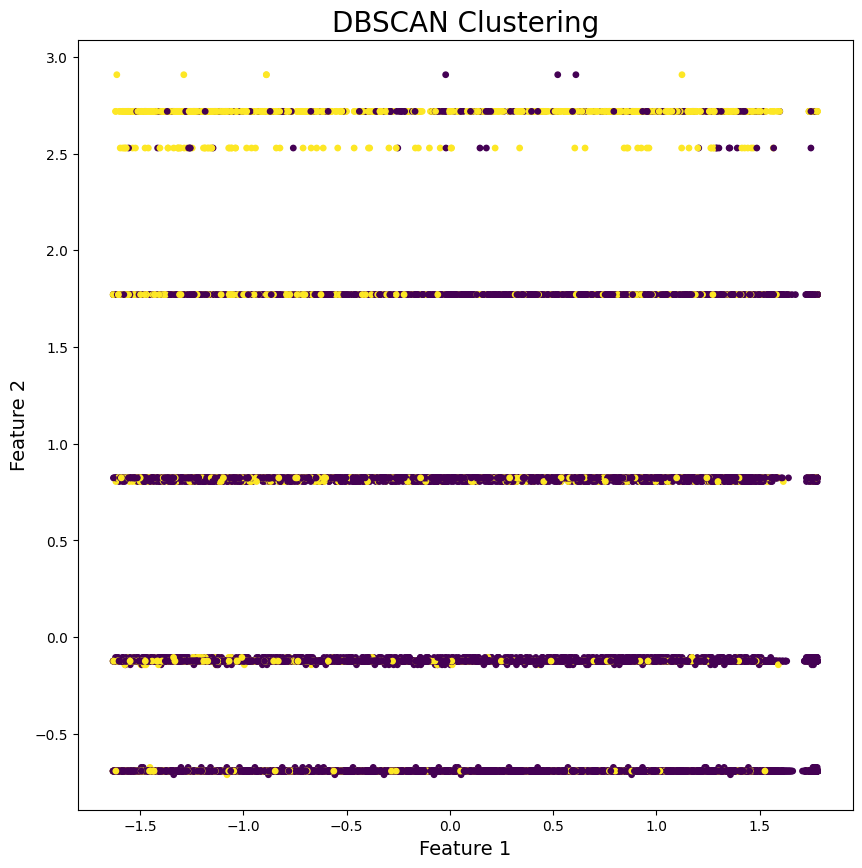

In [52]:
# plot such that all the datapoints are grey
# using the fraud_col, color code the datapoints on the same plot as the DBSCAN, where fraud is red and non-fraud is grey
plt.figure(figsize=(10,10))
plt.scatter(impt_data.iloc[:, 1],impt_data.iloc[:, 2],
            c=impt_data_w_fraud['fraud_bool'],
            s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [53]:
# select value of epison from K-distance graph
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(impt_data)
distances, indices = nbrs.kneighbors(impt_data)

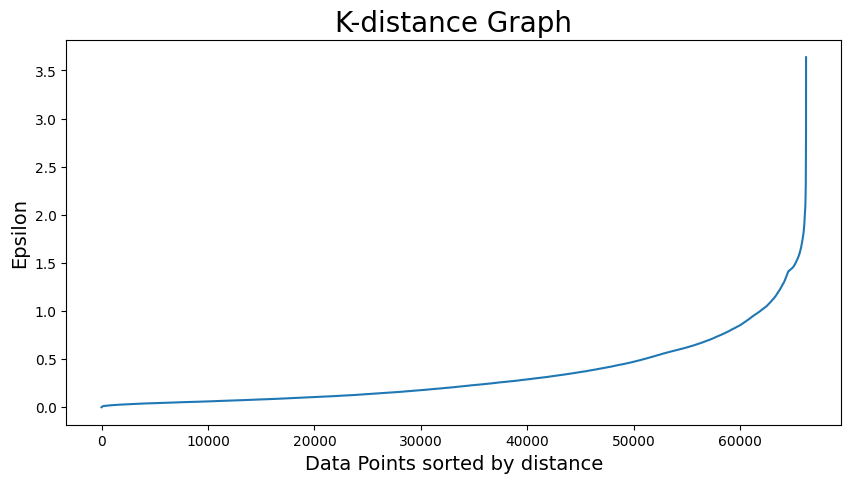

In [54]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### Generate impt_data again

In [95]:
# generate impt_data again
impt_data = data[important_features]

categorical_columns = ['device_os', 'housing_status', 'has_other_cards', 'phone_home_valid', 'keep_alive_session']
numerical_columns = [col for col in impt_data.columns if col not in categorical_columns]

# standardize numerical columns
scaler = StandardScaler()
impt_data[numerical_columns] = scaler.fit_transform(impt_data[numerical_columns])

# one-hot encode categorical columns
impt_data = pd.get_dummies(impt_data, columns=categorical_columns)

# check shape
print(f'impt_data shape: {impt_data.shape}')
impt_data.head()

impt_data shape: (66174, 23)


/var/folders/_3/8z9s_23x6w349w1_9vlqlhzh0000gn/T/ipykernel_19024/1226767202.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impt_data[numerical_columns] = scaler.fit_transform(impt_data[numerical_columns])


,credit_risk_score,name_email_similarity,proposed_credit_limit,prev_address_months_count,intended_balcon_amount,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,...,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,has_other_cards_0,has_other_cards_1,phone_home_valid_0,phone_home_valid_1,keep_alive_session_0,keep_alive_session_1
753634,0.552620,1.278732,-0.124008,-0.378350,-0.458333,True,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
345096,-1.008408,-1.548023,-0.692388,0.285315,4.901653,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,True
192108,-0.397571,-0.279620,-0.692388,-0.378350,-0.010577,False,False,False,True,False,...,False,True,False,False,False,True,False,True,False,True
987234,-0.438294,-1.487486,-0.692388,-0.378350,-0.431571,False,False,False,True,False,...,False,False,False,False,True,False,False,True,True,False
318577,0.145395,1.488374,-0.124008,3.579937,4.623343,False,False,False,True,False,...,False,False,False,False,True,False,True,False,True,False


In [96]:
# fit DBSCAN eps=1.5 first
dbscan = DBSCAN(eps=1.5, min_samples=17)
dbscan.fit(impt_data)

labels = dbscan.labels_
# add labels to dataset
impt_data['DBSCAN_labels'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 3634


In [97]:
# create fraud column
fraud_col = data['fraud_bool']

# combine impt_data and fraud_col store in another df
impt_data_w_fraud = pd.concat([impt_data, fraud_col], axis=1)

# create colors
colors = np.where(impt_data_w_fraud['fraud_bool'] == 1, 'red', 'grey')

# check shape
print(f'impt_data_w_fraud shape: {impt_data_w_fraud.shape}')
impt_data_w_fraud.head()

impt_data_w_fraud shape: (66174, 25)


,credit_risk_score,name_email_similarity,proposed_credit_limit,prev_address_months_count,intended_balcon_amount,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,...,housing_status_BF,housing_status_BG,has_other_cards_0,has_other_cards_1,phone_home_valid_0,phone_home_valid_1,keep_alive_session_0,keep_alive_session_1,DBSCAN_labels,fraud_bool
753634,0.552620,1.278732,-0.124008,-0.378350,-0.458333,True,False,False,False,False,...,False,False,True,False,True,False,True,False,0,0
345096,-1.008408,-1.548023,-0.692388,0.285315,4.901653,False,False,True,False,False,...,False,False,True,False,True,False,False,True,-1,0
192108,-0.397571,-0.279620,-0.692388,-0.378350,-0.010577,False,False,False,True,False,...,False,False,False,True,False,True,False,True,0,0
987234,-0.438294,-1.487486,-0.692388,-0.378350,-0.431571,False,False,False,True,False,...,False,False,True,False,False,True,True,False,0,0
318577,0.145395,1.488374,-0.124008,3.579937,4.623343,False,False,False,True,False,...,False,False,True,False,True,False,True,False,-1,1


In [101]:
impt_data_w_fraud.columns

Index(['credit_risk_score', 'name_email_similarity', 'proposed_credit_limit',
       'prev_address_months_count', 'intended_balcon_amount',
       'device_os_linux', 'device_os_macintosh', 'device_os_other',
       'device_os_windows', 'device_os_x11', 'housing_status_BA',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
       'has_other_cards_0', 'has_other_cards_1', 'phone_home_valid_0',
       'phone_home_valid_1', 'keep_alive_session_0', 'keep_alive_session_1',
       'DBSCAN_labels', 'fraud_bool'],
      dtype='object')

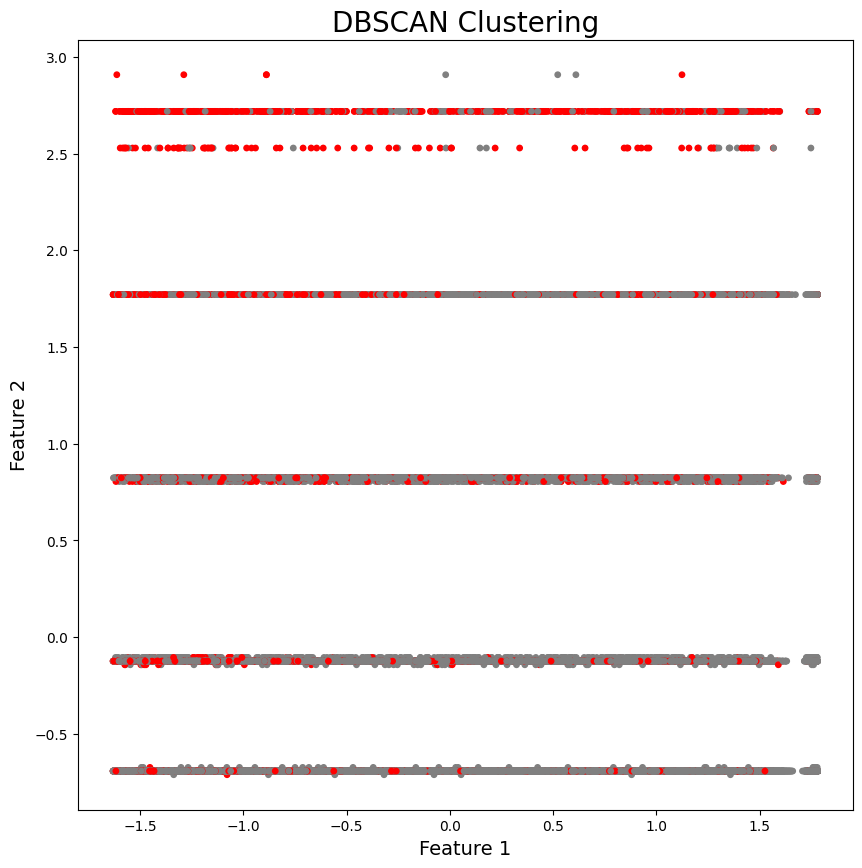

In [110]:
# plot such that all the datapoints are grey
# using the fraud_col, color code the datapoints on the same plot as the DBSCAN, where fraud is red and non-fraud is grey
plt.figure(figsize=(10,10))
plt.scatter(impt_data.iloc[:, 1],impt_data.iloc[:, 2],
            c=colors,
            s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

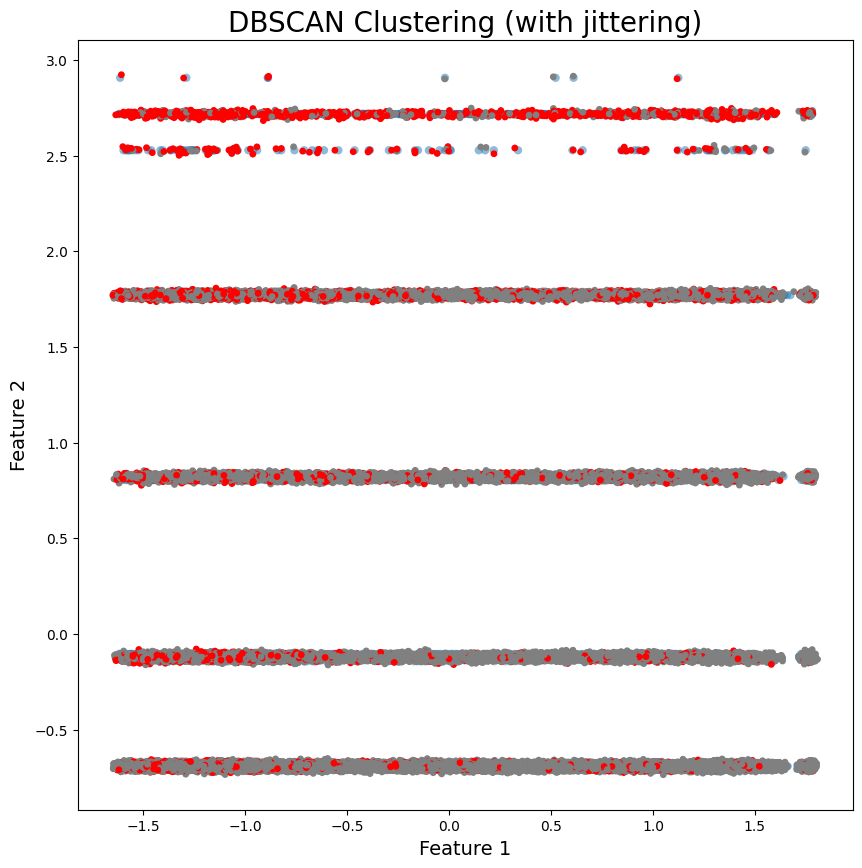

In [112]:
# plot such that all the datapoints are grey
# using the fraud_col, color code the datapoints on the same plot as the DBSCAN, where fraud is red and non-fraud is grey

# columns 8 and 21 are 'device_os_windows' and 'keep_alive_session_0'
# columns 1 and 2 are 'name_email_similarity' and 'proposed_credit_limit'
plt.figure(figsize=(10,10))
# Plot original data with jitter
plt.scatter(impt_data.iloc[:, 1],impt_data.iloc[:, 2], label='Original Data', alpha=0.5, edgecolor='none')

# jitter the points
jitter_amount = 0.01
feature1 = impt_data.iloc[:, 1] + np.random.normal(0, jitter_amount, len(impt_data))
feature2 = impt_data.iloc[:, 2] + np.random.normal(0, jitter_amount, len(impt_data))

plt.scatter(feature1,feature2,
            c=colors,
            s=15)
plt.title('DBSCAN Clustering (with jittering)',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [113]:
# count values of labels
impt_data['DBSCAN_labels'].value_counts()

DBSCAN_labels
 0    62389
-1     3634
 3       54
 4       42
 1       22
 5       17
 2       16
Name: count, dtype: int64

In [114]:
# group by 'DBSCAN_labels' and 'fraud_bool' and count
impt_data_w_fraud.groupby(['DBSCAN_labels', 'fraud_bool']).size()

DBSCAN_labels  fraud_bool
-1             0              3256
               1               378
 0             0             51773
               1             10616
 1             0                19
               1                 3
 2             0                14
               1                 2
 3             0                33
               1                21
 4             0                39
               1                 3
 5             0                11
               1                 6
dtype: int64

In [ ]:
# split session_length_in_minutes into 2 groups, fraud and non-fraud
session_length_fraud = device_activity_df[device_activity_df['fraud_bool'] == 1][['session_length_in_minutes', 'fraud_bool']]
sessions_length_non_fraud = device_activity_df[device_activity_df['fraud_bool'] == 0][['session_length_in_minutes', 'fraud_bool']]

# print shapes
print(f"fraud shape: {session_length_fraud.shape}")
print(f"non-fraud shape: {sessions_length_non_fraud.shape}")

In [ ]:
# plot boxplot for non-fraud session length in minutes
# plot side by side, with different colors, on columns 'session_length_in_minutes'
plt.figure(figsize=(6, 3))
sns.boxplot(data=session_length_fraud, x='session_length_in_minutes', color='red')

In [ ]:
# plot boxplot for non-fraud session length in minutes
plt.figure(figsize=(6, 3))
sns.boxplot(data=sessions_length_non_fraud, x='session_length_in_minutes', color='blue')

In [ ]:
# check value_counts for device_distinct_emails_8w
device_activity_df['device_distinct_emails_8w'].value_counts()

In [ ]:
# select device_distinct_emails_8w and fraud_bool columns, and select all the frauds
device_distinct_emails_fraud = device_activity_df[device_activity_df['fraud_bool'] == 1][['device_distinct_emails_8w', 'fraud_bool']]
device_distinct_emails_non_fraud = device_activity_df[device_activity_df['fraud_bool'] == 0][['device_distinct_emails_8w', 'fraud_bool']]

# plot count plot for both fraud and non-fraud, in 1 x 2 grid, provide title for each
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=device_distinct_emails_fraud, x='device_distinct_emails_8w', hue='fraud_bool')
plt.title('Fraud')
plt.subplot(1, 2, 2)
sns.countplot(data=device_distinct_emails_non_fraud, x='device_distinct_emails_8w', hue='fraud_bool')
plt.title('Non-Fraud')


In [ ]:
# use the device_activity_df, combine the device_os and keep_alive_sessions columns
# change device_os and keep_alive_session to str
device_activity_df['device_os'] = device_activity_df['device_os'].astype(str)
device_activity_df['keep_alive_session'] = device_activity_df['keep_alive_session'].astype(str)
device_activity_df['device_os_keep_alive'] = device_activity_df['device_os'] + '_' + device_activity_df['keep_alive_session']

# plot countplot for device_os_keep_alive
plt.figure(figsize=(12, 6))
sns.countplot(data=device_activity_df, x='device_os_keep_alive', hue='fraud_bool')

In [ ]:
# group by device_os_keep_alive
device_os_keep_alive_grouped = device_activity_df.groupby('device_os_keep_alive')
device_os_keep_alive_grouped['fraud_bool'].value_counts()